In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Data exploration

In [53]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [55]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [56]:
df.shape

(48895, 16)

In [57]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [122]:
len(df.host_id.unique())

37455

In [123]:
len(df.neighbourhood_group.unique())

5

In [125]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [126]:
len(df.neighbourhood.unique())

221

In [133]:
len(df.price.unique())

673

In [127]:
len(df.room_type.unique())

3

In [128]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [129]:
len(df.minimum_nights.unique())

109

In [130]:
len(df.number_of_reviews.unique())

394

In [131]:
len(df.calculated_host_listings_count.unique())

47

In [132]:
len(df.availability_365.unique())

366

### 2. Data Cleaning

In [58]:
df.duplicated().sum()

0

In [59]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we have id and host_id we can drop name and host_name, and also last_review column also insignificant

In [60]:
df.drop(['name','host_name','last_review'], axis = 1, inplace = True)

In [66]:
df[df.reviews_per_month == 0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [67]:
df[df.reviews_per_month > df.number_of_reviews]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


#### price

In [68]:
df.price.max(), df.price.min(), df.price.mean()

(10000, 0, 152.7206871868289)

In [75]:
zero_price = df[df.price == 0].index

In [76]:
df.drop(zero_price, axis = 0, inplace = True)

### 3. Data analysis and Visualisations

### Correlation

In [82]:
correlation = df.corr()
correlation

C:\Users\VISHNU PRASAD\AppData\Local\Temp\ipykernel_26516\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588316,-0.003115,0.090895,0.010639,-0.013229,-0.319800,0.291862,0.133275,0.085468
host_id,0.588316,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.296395,0.154949,0.203434
latitude,-0.003115,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.010117,0.019518,-0.010942
longitude,0.090895,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.145888,-0.114715,0.082669
price,0.010639,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.030575,0.057462,0.081847
minimum_nights,-0.013229,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.121644,0.127962,0.144275
number_of_reviews,-0.319800,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.549763,-0.072385,0.171975
reviews_per_month,0.291862,0.296395,-0.010117,0.145888,-0.030575,-0.121644,0.549763,1.000000,-0.009431,0.185730
calculated_host_listings_count,0.133275,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.009431,1.000000,0.225712
availability_365,0.085468,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.185730,0.225712,1.000000


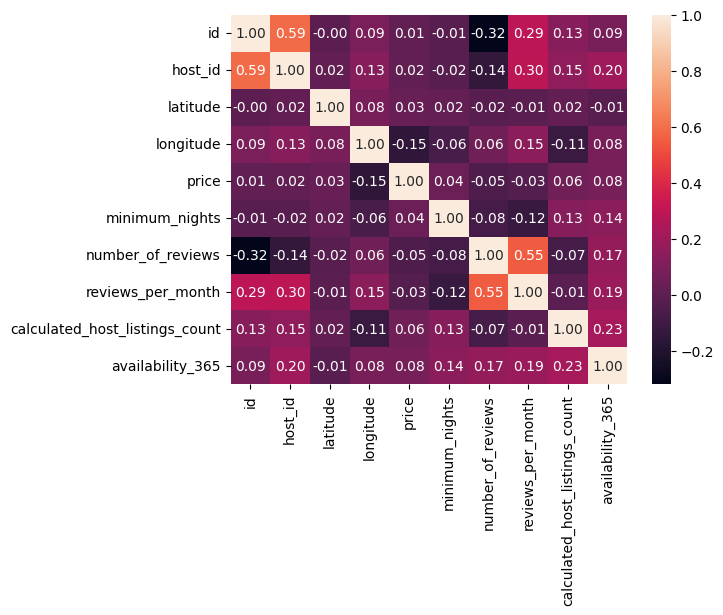

In [212]:
sns.heatmap(correlation, annot = True, fmt = '.2f')
plt.show()

### Price

In [219]:
print(f'Minimum Price = {df.price.min()} $')
print(f'Maximum Price = {df.price.max()} $')
print(f'Average Price = {df.price.mean()} $')

Minimum Price = 10 $
Maximum Price = 10000 $
Average Price = 152.75505277800508 $


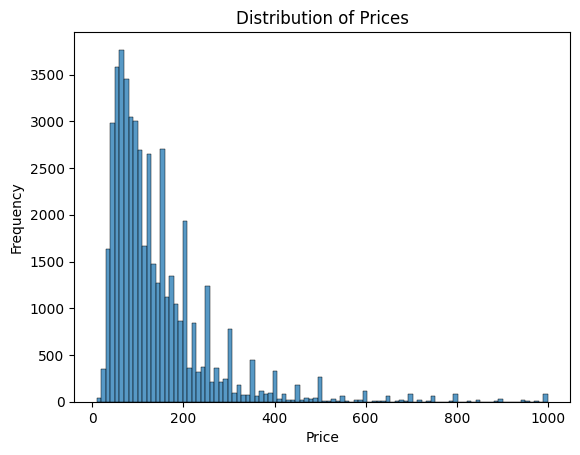

In [177]:
sns.histplot(df[df['price'] <= 1000], x = 'price', bins=100, kde=False)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The majority of rental prices are below $200.

#### Neighbourhood Group

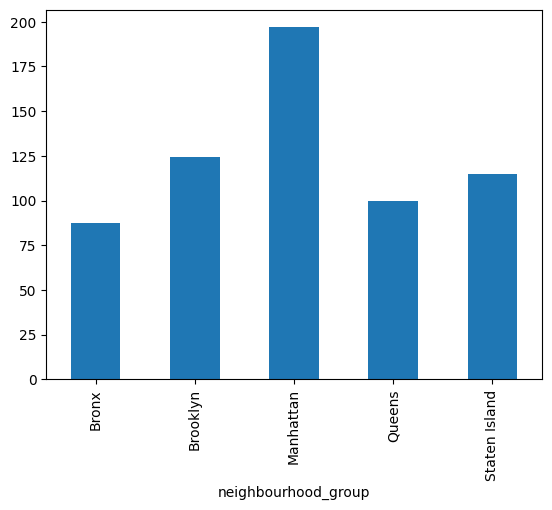

In [223]:
average_price_per_neighbourhood_group = df.groupby('neighbourhood_group').price.mean()
average_price_per_neighbourhood_group.plot(kind = 'bar')
plt.show()

Based on the visualization, it's evident that properties within the Manhattan neighborhood group exhibit the highest average price, while those in the Bronx demonstrate the lowest average price.

#### Neighbourhood

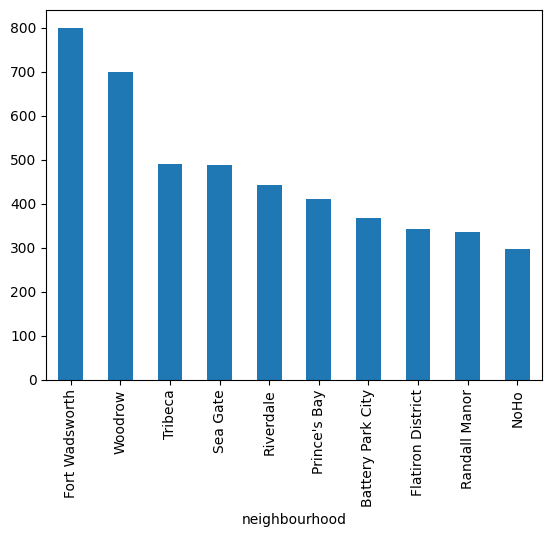

In [221]:
average_price_per_neighbourhood = df.groupby('neighbourhood').price.mean()
average_price_per_neighbourhood_top10 = average_price_per_neighbourhood.sort_values(ascending = False).head(10)
average_price_per_neighbourhood_top10 .plot(kind= 'bar')
plt.show()

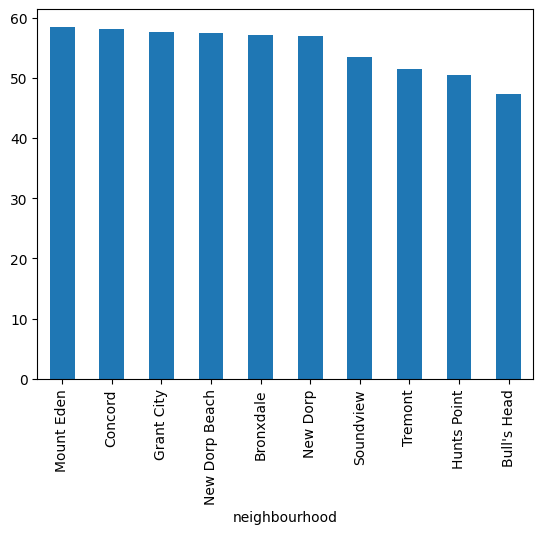

In [222]:
average_price_per_neighbourhood_bottom10 = average_price_per_neighbourhood.sort_values(ascending = False).tail(10)
average_price_per_neighbourhood_bottom10.plot(kind= 'bar')
plt.show()

These two visuals indicate that Fort Wadsworth stands out as the neighborhood with the highest average price, while Bull's Head represents the neighborhood with the lowest average price.

#### Room type 

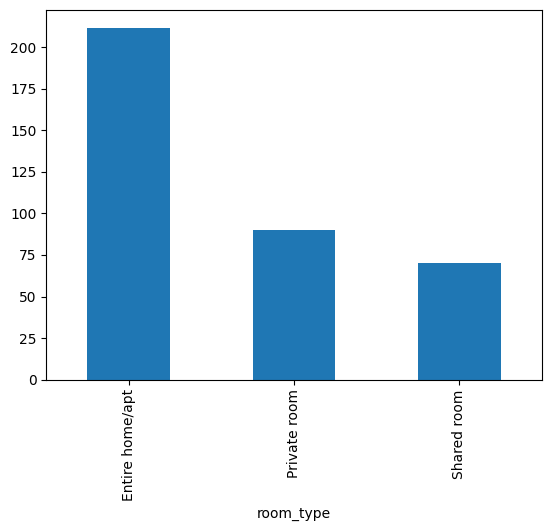

In [224]:
room_type_price = df.groupby('room_type').price.mean()
room_type_price.plot(kind = 'bar')
plt.show()

Renting an entire home or apartment corresponds to the highest price, whereas opting to share a room results in the lowest price.

#### Number of reviews

<Axes: xlabel='number_of_reviews', ylabel='price'>

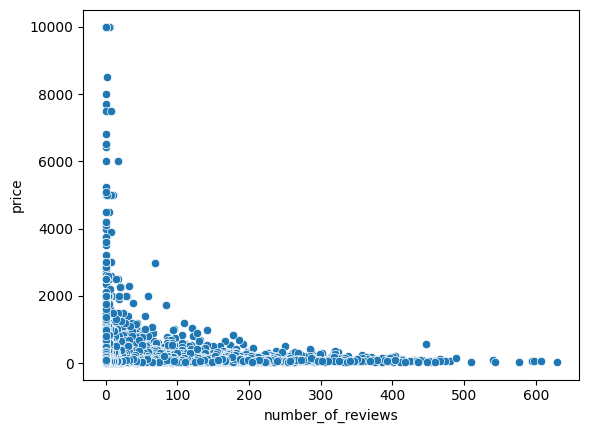

In [116]:
sns.scatterplot(x = df.number_of_reviews, y = df.price)

Listings with the lowest prices tend to have the highest number of reviews. As prices increase, there is a general decrease in the number of reviews; however, it's worth noting that there are also instances of low-priced listings with the least number of reviews.

### Host

In [227]:
host_values = df.host_id.value_counts().sort_values(ascending = False).head(10)

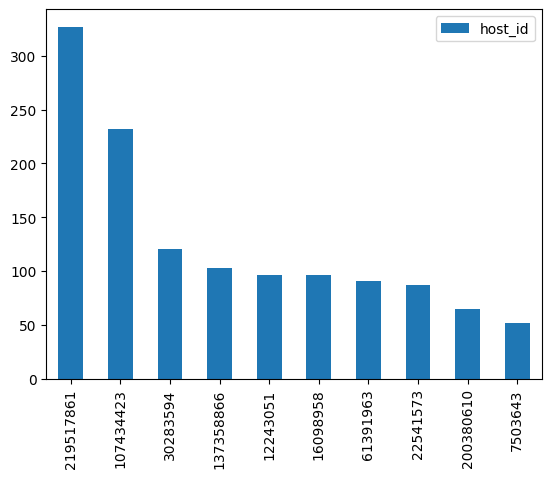

In [225]:
top10_host = pd.DataFrame(host_values)
top10_host.plot(kind = 'bar')
plt.show()

Host ID 219517861 stands out as the most prolific host in this dataset, with an impressive count of over 300 listings.

### Neighbourhood Group

In [228]:
neighbourhood_group_values = df.neighbourhood_group.value_counts().sort_values(ascending = False).head(10)

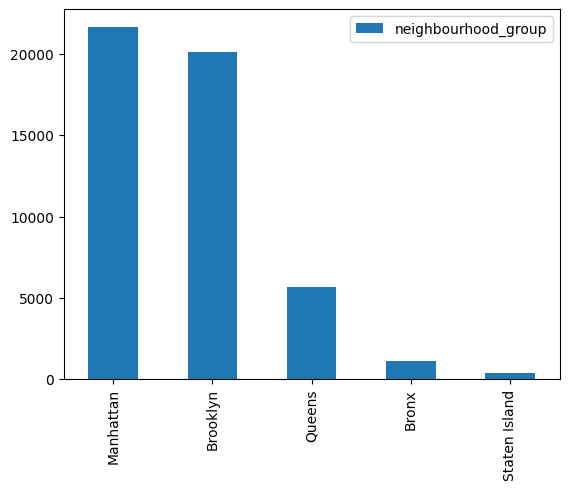

In [226]:
top_neighbourhood_group = pd.DataFrame(neighbourhood_group_values)
top_neighbourhood_group.plot(kind = 'bar')
plt.show()

A significant portion of the listings originate from the Manhattan Neighborhood Group, whereas Staten Island has the lowest number of listings in comparison.

### Neighbourhood

In [229]:
neighbourhood_values = df.neighbourhood.value_counts().sort_values(ascending = False).head(10)

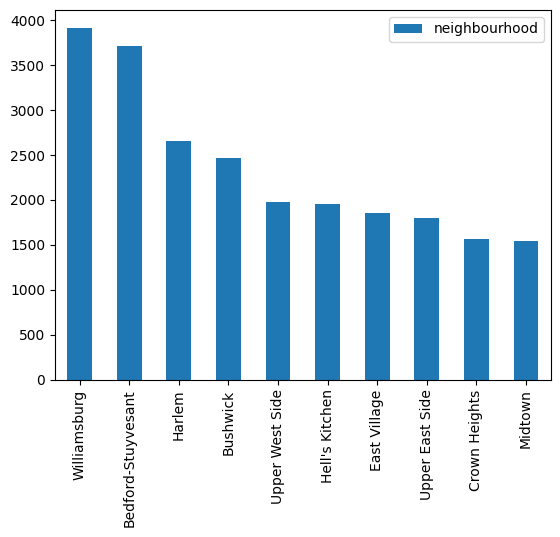

In [230]:
top_neighbourhood = pd.DataFrame(neighbourhood_values)
top_neighbourhood.plot(kind = 'bar')
plt.show()

Williamsburg takes the lead as the neighborhood with the highest number of listings, closely followed by Bedford Stuyvesant.

### Room type

<Axes: >

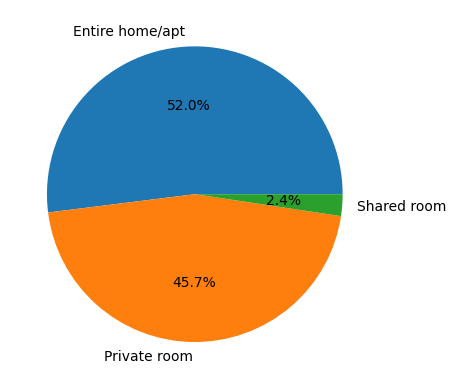

In [162]:
df.groupby('room_type').size().plot(kind = 'pie', autopct='%1.1f%%')

The analysis reveals that the majority of room types, comprising around 52%, are categorized as "entire home or apartment." Following closely is the "private room" type, accounting for approximately 45.7%. Conversely, only a small fraction constitutes the "shared room" type.

### Minimum Nights

In [181]:
print('Minimum of Minimum Nights =', df.minimum_nights.min())
print('Maximum of Minimum Nights =', df.minimum_nights.max())
print('Mean of Minimum Nights    =', df.minimum_nights.mean())

Minimum of Minimum Nights = 1
Maximum of Minimum Nights = 1250
Mean of Minimum Nights    = 7.029887079617053


Here we can see that the minimum value for minimum nights is 1 and maximum is 1250, but it can be a outlier . Minimum nights having value greater than 30 will be possibly an error

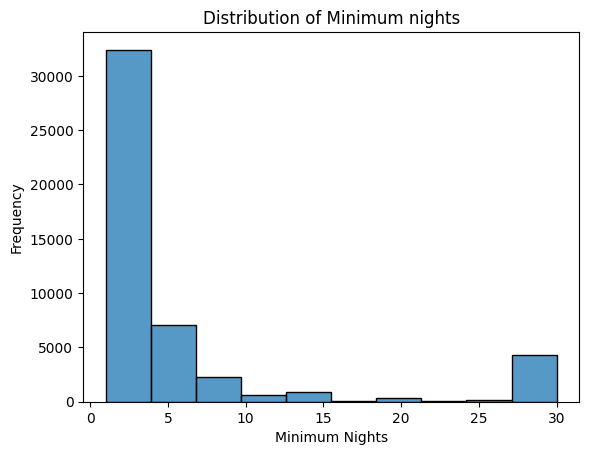

In [239]:
sns.histplot(df[df.minimum_nights <= 30], x= 'minimum_nights',bins= 10, kde = False)
plt.title('Distribution of Minimum nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()


A large portion of the properties have a minimum stay requirement of under 10 nights.

### Number of Reviews 

In [236]:
df[df.number_of_reviews == df.number_of_reviews.sort_values(ascending = False).max()]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,47621202,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,14.58,2,333


The host with ID 47621202, situated in the Jamaica neighborhood of the Queens neighborhood group, garners the highest number of reviews, totaling 629.

### Conclusion

In analyzing NYC Airbnb data, we've uncovered significant insights:

1. Pricing Diversity: Many rentals fall below $200, catering to various budgets.
2. Neighborhood Nuances: Manhattan boasts high-end options, while Bronx offers affordability.
3. Room Types & Rates: Entire units command higher prices, shared rooms are budget-friendly.
4. Review & Price Dynamics: Low prices don't always correlate with more reviews.
5. Host Impact: ID 219517861 manages 300+ listings, influencing the market.
6. Neighborhood Trends: Williamsburg leads listings, followed by Bedford Stuyvesant.
7. Preferred Stays: Most stays are under 10 nights, catering to diverse durations.

This data-driven NYC Airbnb analysis aids both hosts and guests in navigating the dynamic rental landscape.